# Comparación de Linear Regression vs Random Forest

## Predicción de precio de casas

Recordemos las métricas obtenidas en la regresion multivariante con LinearRegression para el caso multivariante

MAE :   121274.02

MSE :   34081316608.80

RMSE:   184611.26

R2  :   0.74

**Nota**: El contexto de este problema se encuentra en el notebook de LinearRegression

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
df = pd.read_csv('kc_house_data_final.csv')

In [36]:
x=df[['bedrooms',
        'bathrooms',
        'sqft_living',
        'sqft_lot',
        'floors',
        'waterfront',
        'view',
        'condition',
        'grade',
        'sqft_basement',
        'yr_built',
        'year_renovated',
        'zipcode',
        'lat',
        'long',
        'sqft_living15',
        'sqft_lot15',
        'year',
        'month',
        'day'
]].values
y = df['price'].values

In [37]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 3)

In [38]:
escalador = StandardScaler()

escalador.fit(x_train)
x_train = escalador.transform(x_train)
x_test = escalador.transform(x_test)

In [39]:
modelo = RandomForestRegressor()

In [40]:
modelo.fit(x_train,y_train)
y_pred = modelo.predict(x_test)

In [41]:
r2_score(y_test,y_pred)

0.862426578180856

Aqui vemos una mejora notable en el R2 usando bosques aleatorios en comparación al R2 = 0,74 que obtuvimos usando la regresion lineal

In [46]:
r2_linreg = r2_score(y_test, y_pred)
MAE_linreg = mean_absolute_error(y_test, y_pred)
MSE_linreg = mean_squared_error(y_test, y_pred)
RMSE_linreg = np.sqrt(MSE_linreg)

Veamos otras métricas

In [47]:
print("")
print(f'MAE :   {MAE_linreg:.2f}')
print(f'MSE :   {MSE_linreg:.2f}')
print(f"RMSE:   {RMSE_linreg:.2f}")
print(f"R2  :   {r2_linreg:.2f}")


MAE :   70184.05
MSE :   19091042429.16
RMSE:   138170.34
R2  :   0.86


Por último veamos cómo se comporta la dispersion de las predicciones y los valores reales

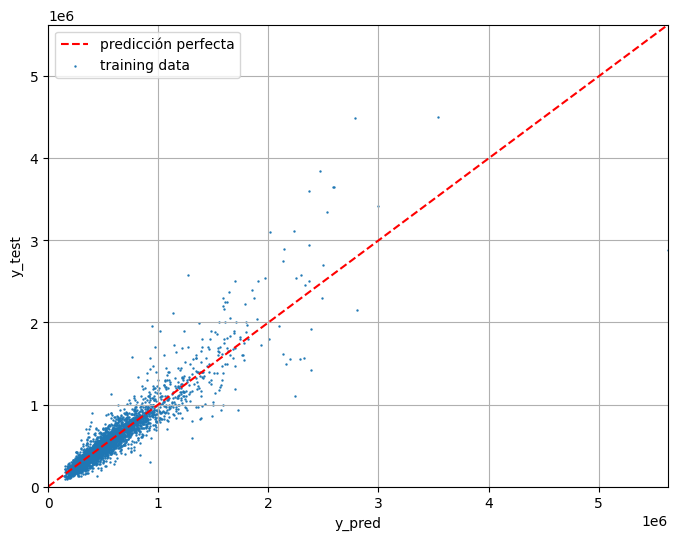

In [50]:
fig,ax=plt.subplots(1,1,figsize=(8,6))

x_ref=np.linspace(0,np.max(y_pred),100)
y_ref=np.linspace(0,np.max(y_pred),100)
ax.plot(x_ref,y_ref,'--r' ,label='predicción perfecta')

ax.scatter(y_pred,y_test, label='training data',s=0.5)

ax.set_xlabel('y_pred')
ax.set_ylabel('y_test')
ax.set_xlim(0,np.max(y_pred))
ax.set_ylim(0,np.max(y_pred))
ax.grid(True)
ax.legend()

Aquí se puede notar una dispersión menor que la obtenida en el caso de LinearRegression